In [1]:
import pandas as pd
import os
import numpy as np

from sklearn.feature_selection import RFECV, RFE
from sklearn.model_selection import KFold

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

os.chdir("D:/WorkPath/PycharmProjects/MutTm-pred")
from Dataset.Process4Dataset.DatasetCeator4PonDT import Dataset4MutTm
from MachineLearning.Util import train_validation_test

# pHTm

In [2]:
dataset_pHTm= Dataset4MutTm(package_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\Process4Dataset",
                          train_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\PonDB\pH-Tm\PonDB.csv",
                          test_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\ProThermDB\pH-Tm\excllent_ProThermDB_Testing.csv",
                          training_version="PonDB_withpHTm",
                          testing_version="ProThermDBTest_withpHTm",
                          selected_columns=["UniProt_ID", "Mutation", "pH", "Tm", "ΔTm"],
                          features=["neighbor", "aaindex", "group", "param", "rpm", "hydrop", "GO", "context_embedding"],
                          context_length=200,
                          embedding_model_path="DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D",
                          embedding_model_name="ESM-2-650M",
                          embedding_method="sub")

pHTm_train_feature = np.array(dataset_pHTm.train_feature_set)
pHTm_train_label = np.array(dataset_pHTm.train_label_set).ravel()
pHTm_test_feature = np.array(dataset_pHTm.test_feature_set)
pHTm_test_leabel = np.array(dataset_pHTm.test_label_set).ravel()

当前使用设备：  NVIDIA GeForce RTX 4070 Ti SUPER
===正在从训练集版本为PonDB_withpHTm、训练集版本为ProThermDBTest_withpHTm的原始数据集中进行数据清洗和生物特征提取工作===
1.预处理训练集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-前一数据集采用了后一数据集中的0条数据，现已删除
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了49个UniProtID无法获取序列的数据
-删除了2989条非法长度的数据，当前蛋白质长度被限制在(200, 5000)
-删除条379个突变位点对应错误的数据
2.预处理测试集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了0个UniProtID无法获取序列的数据
-删除了137条非法长度的数据，当前蛋白质长度被限制在(200, 5000)
-删除条10个突变位点对应错误的数据
3.为训练集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.494685649871826
-释放模型后显存用量: 0.011113166809082031
4.为测试集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.503221035003662
-释放模型后显存用量: 0.011113166809082031
5.利用GO富集分析从训练集和测试集中提取LR与PA值
-获取[GO]特征.....

100%|██████████| 213/213 [00:00<00:00, 9256.65it/s]


6.从全数据集中提取生物特征集、标签集和基本信息集...
7.数据清洗和生物特征提取工作完成==>当前显存用量:0.0079345703125


Starting Training...
[LightGBM] [Info] Total Bins 141709
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1152
[LightGBM] [Info] Start training from score -2.004381
Time for Training: 0.7265012264251709
[LightGBM] [Info] Total Bins 134412
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1149
[LightGBM] [Info] Start training from score -2.049294
[LightGBM] [Info] Total Bins 135319
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1149
[LightGBM] [Info] Start training from score -2.019805
[LightGBM] [Info] Total Bins 133134
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1147
[LightGBM] [Info] Start training from score -1.971033
[LightGBM] [Info] Total Bins 135026
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1149
[LightGBM] [Info] Start training from score -2.050462
[LightGBM] [Info] Tot

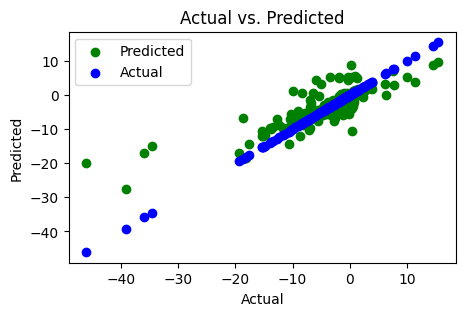

In [3]:
train_validation_test(LGBMRegressor(force_col_wise=True),
                      pHTm_train_feature,
                      pHTm_train_label,
                      pHTm_test_feature,
                      pHTm_test_leabel)

Starting Training...
Time for Training: 1.9395983219146729
The Result for CV:
MAE:2.0299
PCC:0.8807
R2:0.7735
RMSE:3.6016
Time for CV:9.315308570861816
Starting Testing...
The Result for Testing:MAE:3.9726
PCC:0.7429
R2:0.4753
RMSE:5.2459
Time for Testing:0.0030007362365722656


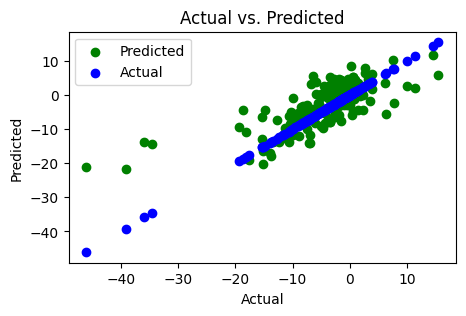

In [4]:
init_xgb_trainer = XGBRegressor()
train_validation_test(init_xgb_trainer,
                      pHTm_train_feature,
                      pHTm_train_label,
                      pHTm_test_feature,
                      pHTm_test_leabel)

# Tm

In [5]:
dataset_Tm= Dataset4MutTm(package_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\Process4Dataset",
                          train_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\PonDB\Tm\PonDB.csv",
                          test_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\ProThermDB\Tm\excllent_ProThermDB_Testing.csv",
                          training_version="PonDB_withTm",
                          testing_version="ProThermDBTest_withTm",
                          selected_columns=["UniProt_ID", "Mutation", "Tm", "ΔTm"],
                          features=["neighbor", "aaindex", "group", "param", "rpm", "hydrop", "GO", "context_embedding"],
                          context_length=200,
                          embedding_model_path="DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D",
                          embedding_model_name="ESM-2-650M",
                          embedding_method="sub")

Tm_train_feature = np.array(dataset_Tm.train_feature_set)
Tm_train_label = np.array(dataset_Tm.train_label_set).ravel()
Tm_test_feature = np.array(dataset_Tm.test_feature_set)
Tm_test_leabel = np.array(dataset_Tm.test_label_set).ravel()

当前使用设备：  NVIDIA GeForce RTX 4070 Ti SUPER
===正在从训练集版本为PonDB_withTm、训练集版本为ProThermDBTest_withTm的原始数据集中进行数据清洗和生物特征提取工作===
1.预处理训练集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-前一数据集采用了后一数据集中的0条数据，现已删除
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了49个UniProtID无法获取序列的数据
-删除了2976条非法长度的数据，当前蛋白质长度被限制在(200, 5000)
-删除条379个突变位点对应错误的数据
2.预处理测试集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了0个UniProtID无法获取序列的数据
-删除了137条非法长度的数据，当前蛋白质长度被限制在(200, 5000)
-删除条10个突变位点对应错误的数据
3.为训练集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.503221035003662
-释放模型后显存用量: 0.011113166809082031
4.为测试集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.503221035003662
-释放模型后显存用量: 0.011113166809082031
5.利用GO富集分析从训练集和测试集中提取LR与PA值
-获取[GO]特征.....

100%|██████████| 213/213 [00:00<00:00, 9679.16it/s]


6.从全数据集中提取生物特征集、标签集和基本信息集...
7.数据清洗和生物特征提取工作完成==>当前显存用量:0.0079345703125


Starting Training...
[LightGBM] [Info] Total Bins 141656
[LightGBM] [Info] Number of data points in the train set: 3653, number of used features: 1151
[LightGBM] [Info] Start training from score -2.008412
Time for Training: 0.6407003402709961
[LightGBM] [Info] Total Bins 133859
[LightGBM] [Info] Number of data points in the train set: 2922, number of used features: 1149
[LightGBM] [Info] Start training from score -2.018789
[LightGBM] [Info] Total Bins 134065
[LightGBM] [Info] Number of data points in the train set: 2922, number of used features: 1147
[LightGBM] [Info] Start training from score -1.961370
[LightGBM] [Info] Total Bins 132960
[LightGBM] [Info] Number of data points in the train set: 2922, number of used features: 1147
[LightGBM] [Info] Start training from score -2.024135
[LightGBM] [Info] Total Bins 135288
[LightGBM] [Info] Number of data points in the train set: 2923, number of used features: 1148
[LightGBM] [Info] Start training from score -2.008988
[LightGBM] [Info] Tot

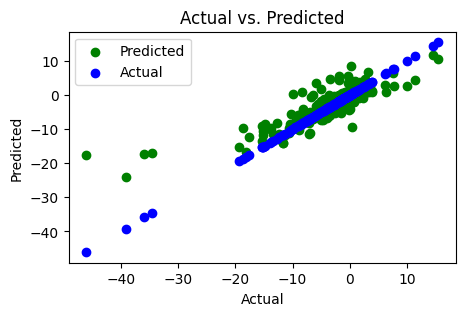

In [6]:
train_validation_test(LGBMRegressor(force_col_wise=True),
                      Tm_train_feature,
                      Tm_train_label,
                      Tm_test_feature,
                      Tm_test_leabel)

Starting Training...
Time for Training: 1.835129737854004
The Result for CV:
MAE:2.1342
PCC:0.8682
R2:0.7519
RMSE:3.7552
Time for CV:9.320516586303711
Starting Testing...
The Result for Testing:MAE:3.3701
PCC:0.7992
R2:0.5674
RMSE:4.7634
Time for Testing:0.004000663757324219


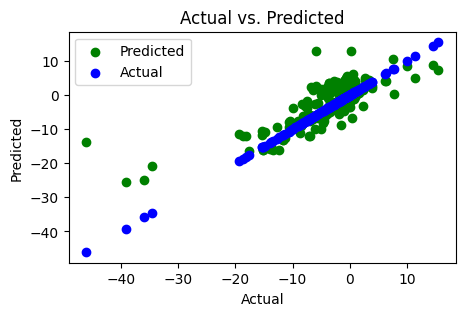

In [7]:
init_xgb_trainer = XGBRegressor()
train_validation_test(init_xgb_trainer,
                      Tm_train_feature,
                      Tm_train_label,
                      Tm_test_feature,
                      Tm_test_leabel)

# Common

In [9]:
dataset_Common = Dataset4MutTm(package_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\Process4Dataset",
                          train_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\PonDB\Common\PonDB.csv",
                          test_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\ProThermDB\Common\excllent_ProThermDB_Testing.csv",
                          training_version="PonDB_Common",
                          testing_version="ProThermDBTest_Common",
                          selected_columns=["UniProt_ID", "Mutation", "ΔTm"],
                          features=["neighbor", "aaindex", "group", "param", "rpm", "hydrop", "GO", "context_embedding"],
                          context_length=200,
                          embedding_model_path="DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D",
                          embedding_model_name="ESM-2-650M",
                          embedding_method="sub")

Common_train_feature = np.array(dataset_Common.train_feature_set)
Common_train_label = np.array(dataset_Common.train_label_set).ravel()
Common_test_feature = np.array(dataset_Common.test_feature_set)
Common_test_leabel = np.array(dataset_Common.test_label_set).ravel()

当前使用设备：  NVIDIA GeForce RTX 4070 Ti SUPER
===正在从训练集版本为PonDB_Common、训练集版本为ProThermDBTest_Common的原始数据集中进行数据清洗和生物特征提取工作===
1.预处理训练集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-前一数据集采用了后一数据集中的0条数据，现已删除
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了25个UniProtID无法获取序列的数据
-删除了1452条非法长度的数据，当前蛋白质长度被限制在(200, 5000)
-删除条339个突变位点对应错误的数据
2.预处理测试集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了0个UniProtID无法获取序列的数据
-删除了109条非法长度的数据，当前蛋白质长度被限制在(200, 5000)
-删除条6个突变位点对应错误的数据
3.为训练集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.503221035003662
-释放模型后显存用量: 0.011113166809082031
4.为测试集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.503221035003662
-释放模型后显存用量: 0.011113166809082031
5.利用GO富集分析从训练集和测试集中提取LR与PA值
-获取[GO]特征.....

100%|██████████| 152/152 [00:00<00:00, 10133.26it/s]


6.从全数据集中提取生物特征集、标签集和基本信息集...
7.数据清洗和生物特征提取工作完成==>当前显存用量:0.0079345703125


Starting Training...
[LightGBM] [Info] Total Bins 116602
[LightGBM] [Info] Number of data points in the train set: 1623, number of used features: 1141
[LightGBM] [Info] Start training from score -2.272619
Time for Training: 0.41013026237487793
[LightGBM] [Info] Total Bins 108577
[LightGBM] [Info] Number of data points in the train set: 1298, number of used features: 1136
[LightGBM] [Info] Start training from score -2.082240
[LightGBM] [Info] Total Bins 107888
[LightGBM] [Info] Number of data points in the train set: 1298, number of used features: 1138
[LightGBM] [Info] Start training from score -2.234315
[LightGBM] [Info] Total Bins 106539
[LightGBM] [Info] Number of data points in the train set: 1298, number of used features: 1137
[LightGBM] [Info] Start training from score -2.386511
[LightGBM] [Info] Total Bins 106908
[LightGBM] [Info] Number of data points in the train set: 1299, number of used features: 1138
[LightGBM] [Info] Start training from score -2.207773
[LightGBM] [Info] To

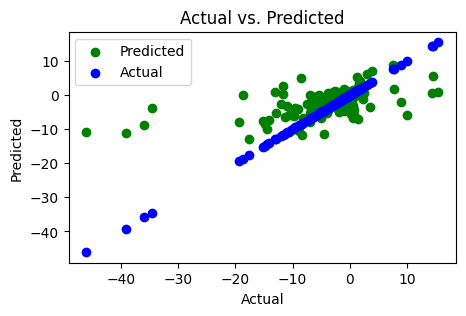

In [10]:
train_validation_test(LGBMRegressor(force_col_wise=True),
                      Common_train_feature,
                      Common_train_label,
                      Common_test_feature,
                      Common_test_leabel)

Starting Training...
Time for Training: 1.5106382369995117
The Result for CV:
MAE:4.3115
PCC:0.5632
R2:0.2706
RMSE:7.0856
Time for CV:7.249760389328003
Starting Testing...
The Result for Testing:MAE:4.0511
PCC:0.5529
R2:0.3044
RMSE:6.7348
Time for Testing:0.003000497817993164


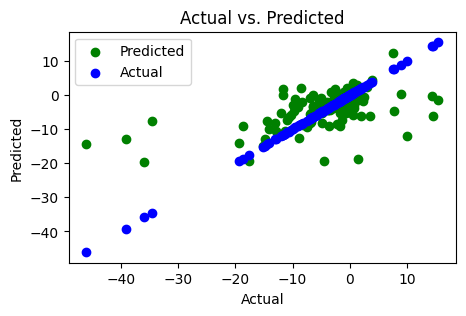

In [11]:
init_xgb_trainer = XGBRegressor()
train_validation_test(init_xgb_trainer,
                      Common_train_feature,
                      Common_train_label,
                      Common_test_feature,
                      Common_test_leabel)